In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
%matplotlib inline

### Question 1)
Read the given dataset as a dataframe and check for missing values

In [2]:
# solution code
df = pd.read_csv("jewel.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print (df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

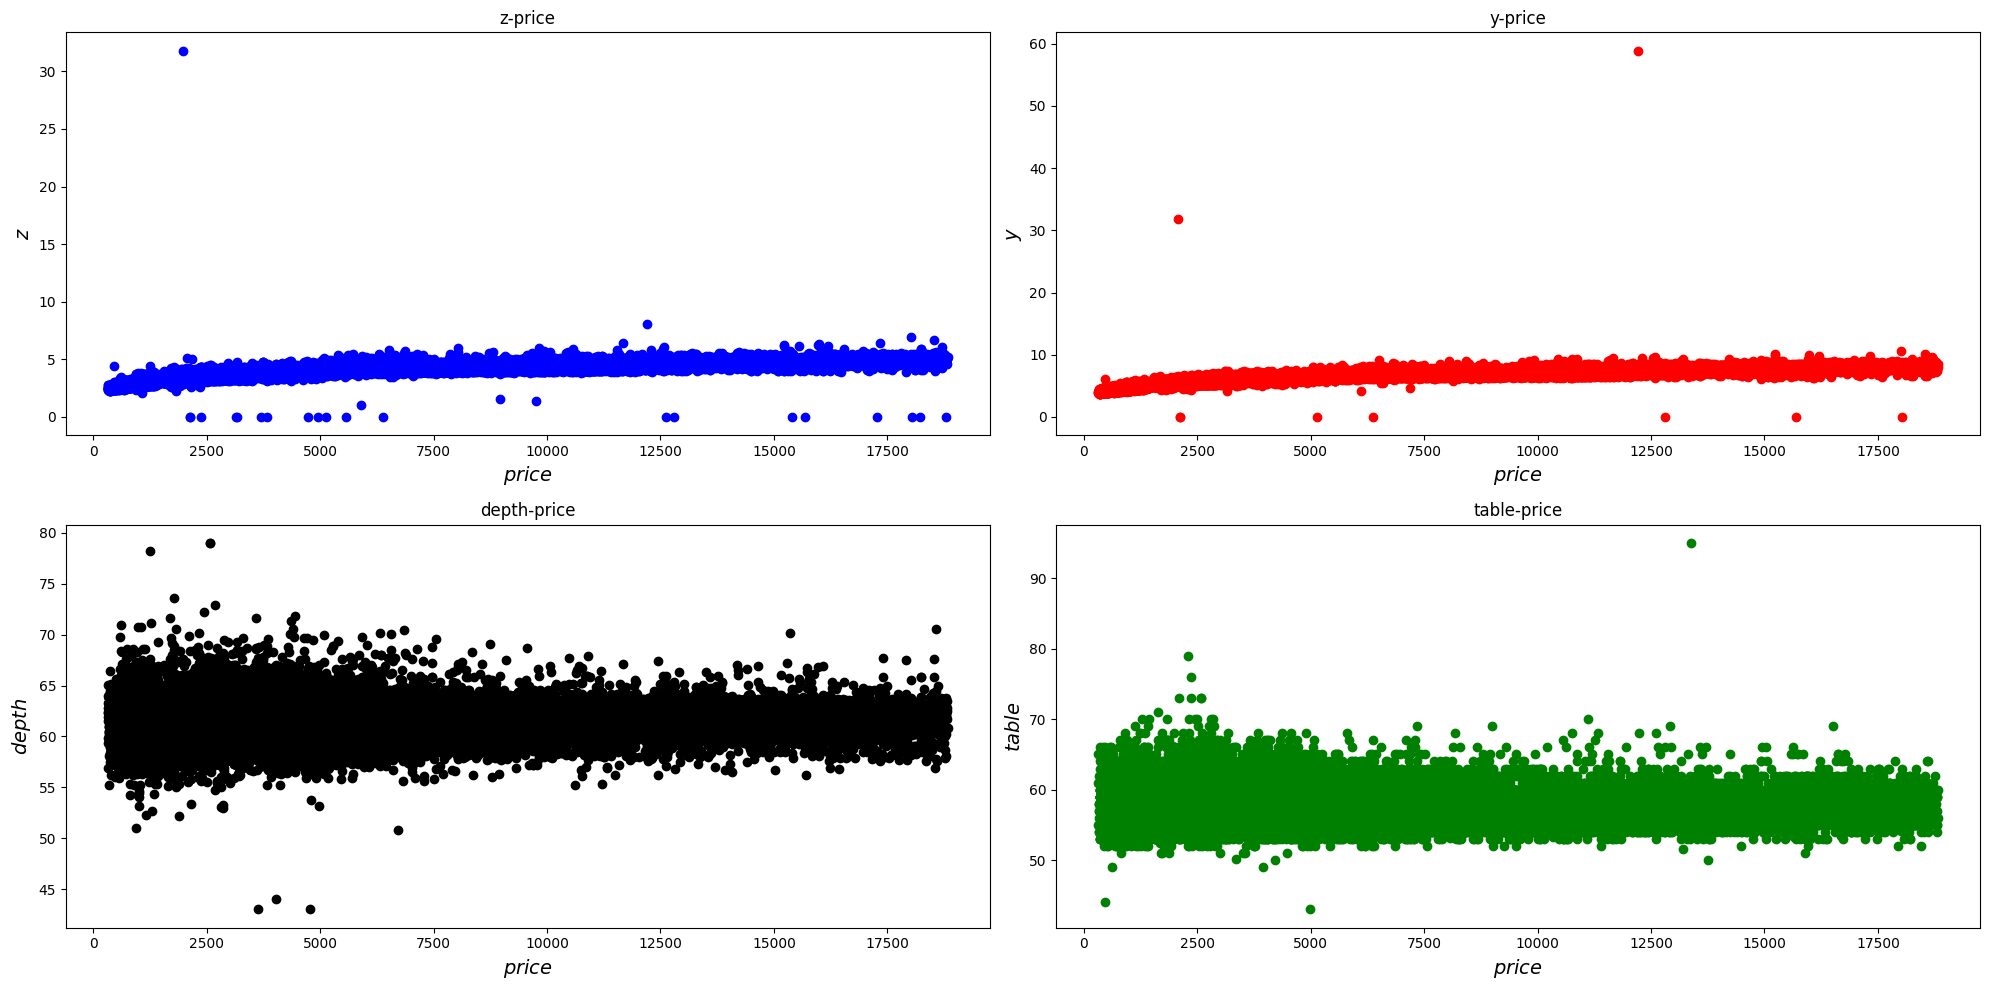

In [5]:
# solution code
def plotdata(df):
    x = df["price"]
    y1 = df["z"]
    y2 = df["y"]
    y3 = df["depth"]
    y4 = df["table"]

    fig1, ax1 = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
    ax1[0, 0].plot(x, y1, "bo")
    ax1[0, 0].set_title("z-price")
    ax1[0, 0].set_xlabel(r'$price$', fontsize = 14)
    ax1[0, 0].set_ylabel(r'$z$', fontsize = 14)

    ax1[0, 1].plot(x, y2, "ro")
    ax1[0, 1].set_title("y-price")
    ax1[0, 1].set_xlabel(r'$price$', fontsize = 14)
    ax1[0, 1].set_ylabel(r'$y$', fontsize = 14)

    ax1[1, 0].plot(x, y3, "ko")
    ax1[1, 0].set_title("depth-price")
    ax1[1, 0].set_xlabel(r'$price$', fontsize = 14)
    ax1[1, 0].set_ylabel(r'$depth$', fontsize = 14)

    ax1[1, 1].plot(x, y4, "go")
    ax1[1, 1].set_title("table-price")
    ax1[1, 1].set_xlabel(r'$price$', fontsize = 14)
    ax1[1, 1].set_ylabel(r'$table$', fontsize = 14)

    plt.tight_layout()
    plt.show()
plotdata(df)

### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

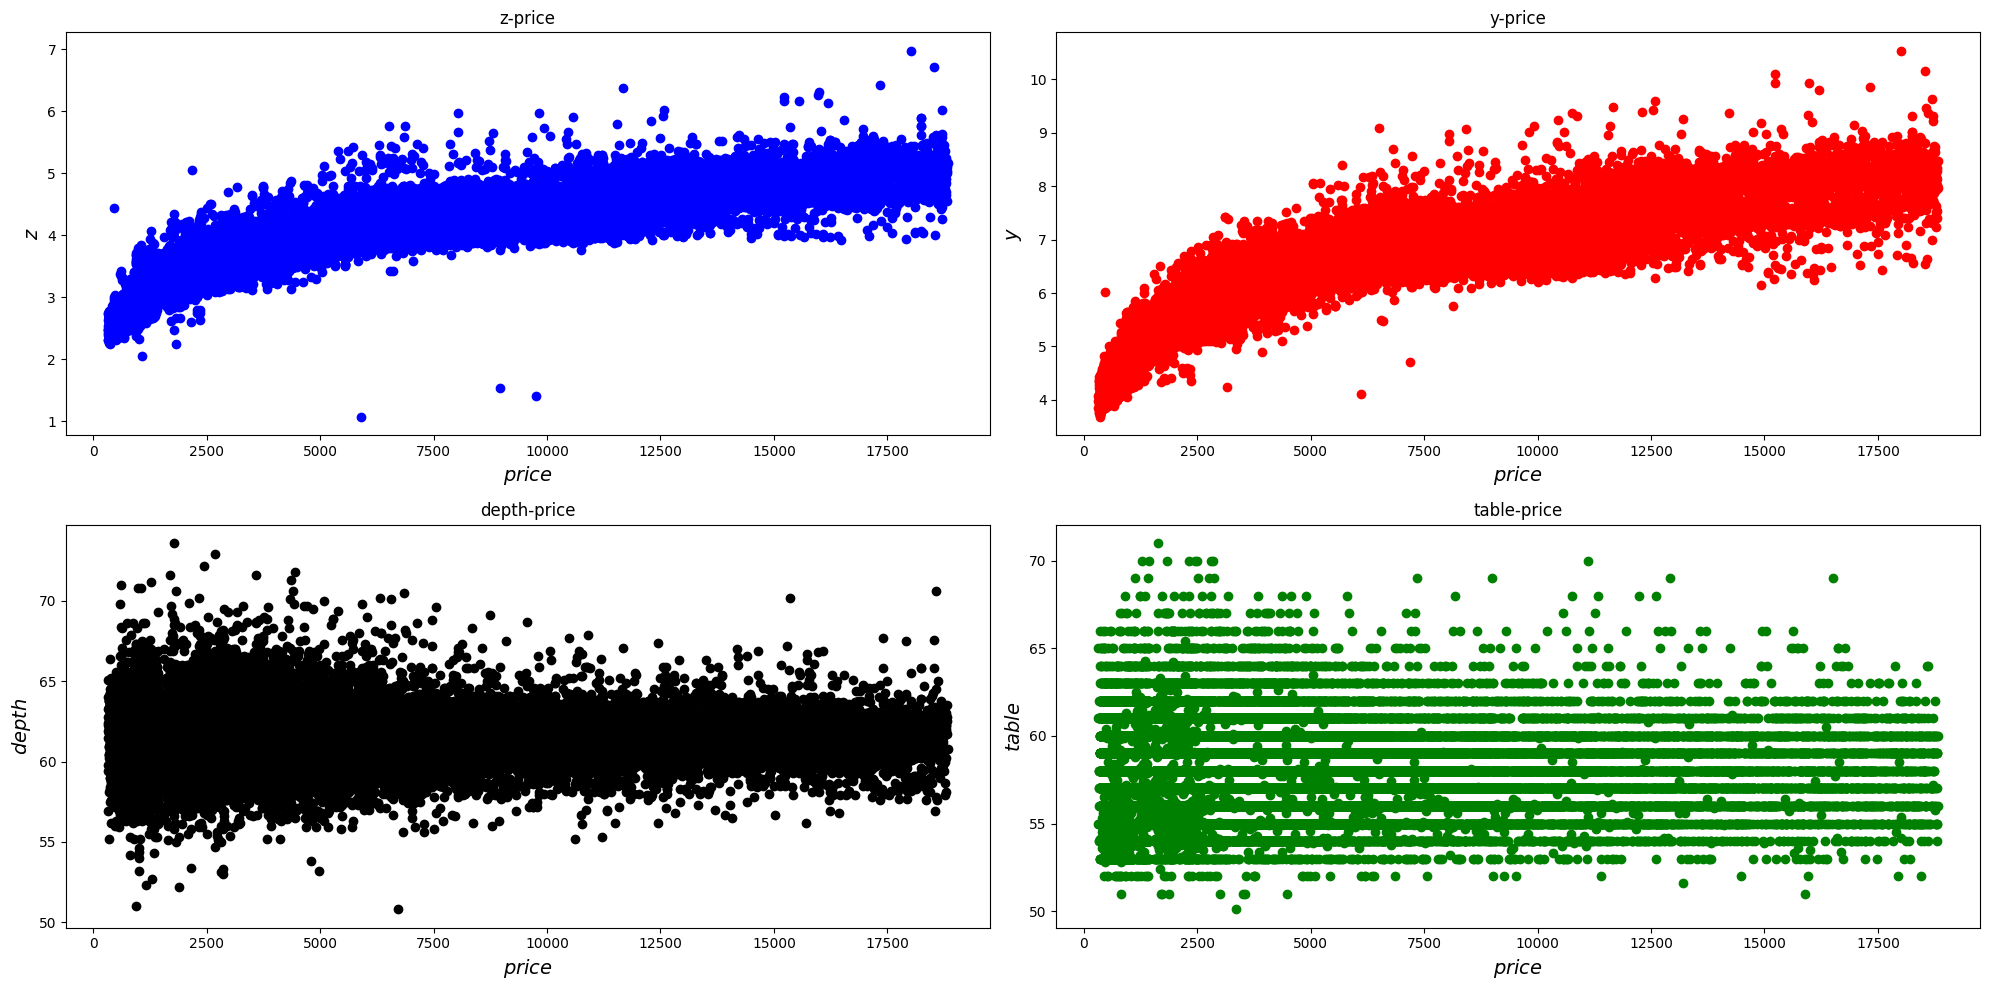

In [6]:
#I remove outliers with my desicion I look at data which is unnatural to the flow of the data  
df[["z","y","depth","table","price"]] = df[["z","y","depth","table","price"]][(df["table"] > 50) & (df["table"] < 72) & 
(df["y"] > 1) & (df["y"] < 12) & (df["depth"] > 50) & (df["depth"] < 75) &
(df["z"] > 1) & (df["z"] < 10)].replace(True)
df.dropna(inplace=True)
plotdata(df)

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [8]:
# solution code
cut_dict={'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5}
color_dict={'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_dict={'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8}

df["cut"].replace(cut_dict,inplace=True)
df["color"].replace(color_dict,inplace=True)
df["clarity"].replace(clarity_dict,inplace=True)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,6,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,5,2,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335.0,4.34,4.35,2.75


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


<AxesSubplot: xlabel='clarity', ylabel='count'>

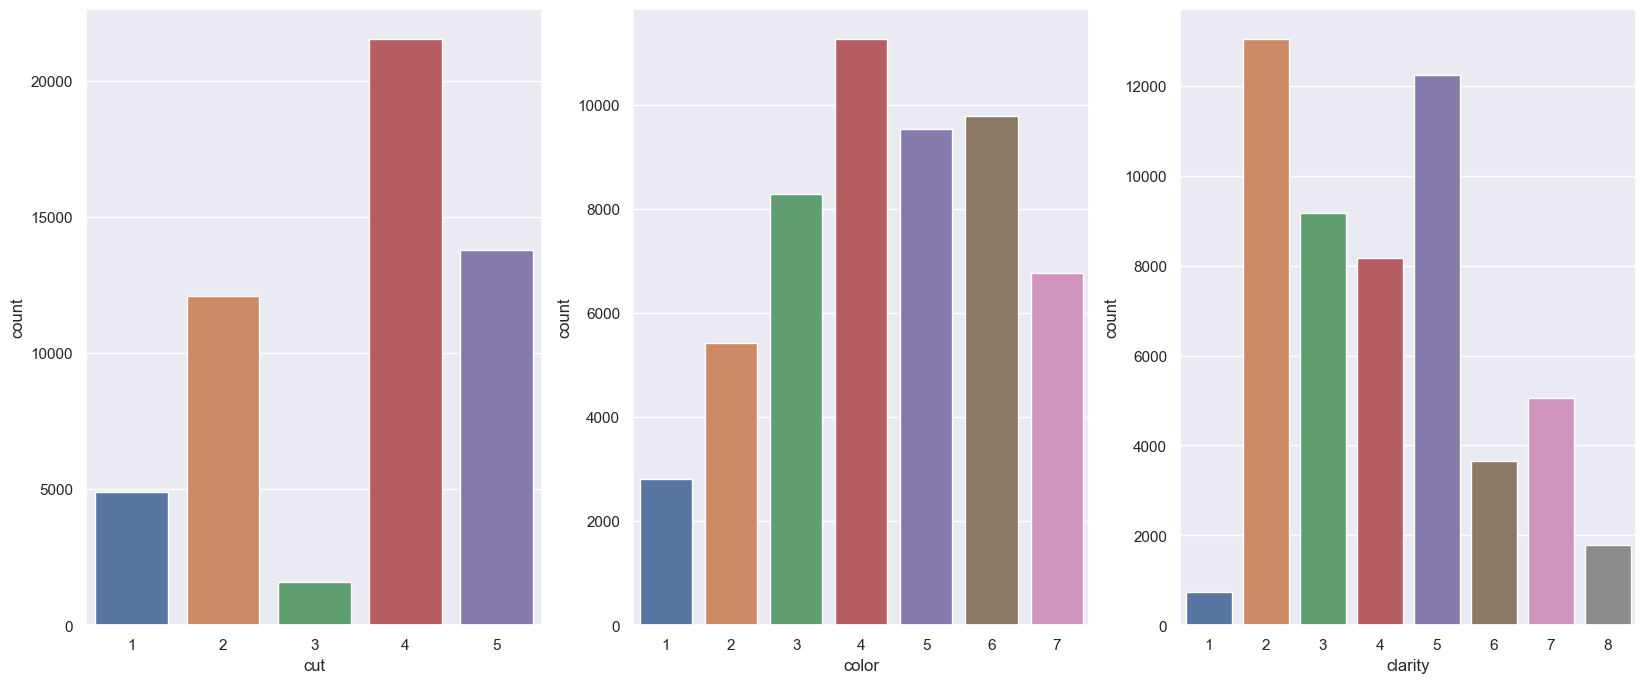

In [9]:
# solution code
sns.set(rc={'figure.figsize':(20,8)})
fig, axs = plt.subplots(ncols=3)
sns.countplot(x=df["cut"],ax=axs[0])
sns.countplot(x=df["color"],ax=axs[1])
sns.countplot(x=df["clarity"],ax=axs[2])

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [10]:
# solution code
import math
shuffle_df = df.sample(frac=1) 
X = np.array(shuffle_df.drop(["price"],1))
y = np.array(shuffle_df["price"])
s_f = 0.7
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 37730
Total Number of rows in test: 16170


### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

In [11]:
# solution code
#I'm going to look for the min val for error rate
sc_X = StandardScaler()
train_X = sc_X.fit_transform(X_train)
test_X = sc_X.fit_transform(X_test)

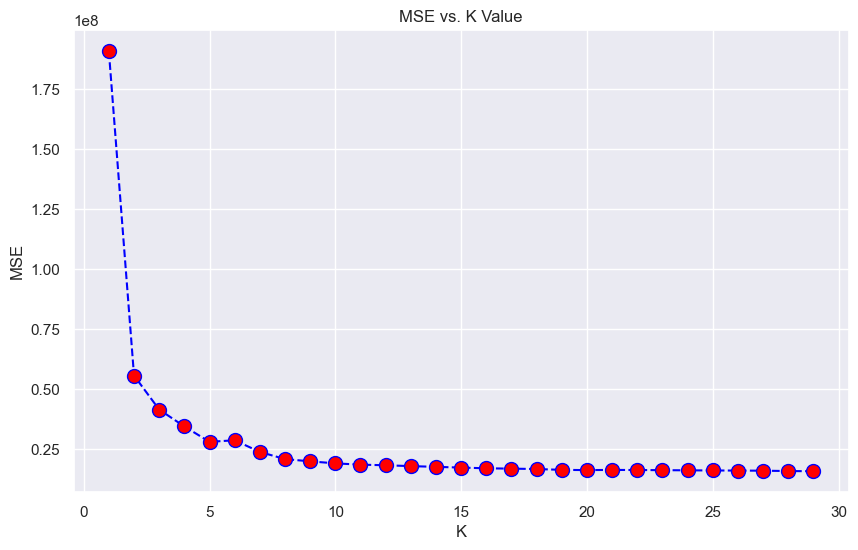

Minimum error:- 15711334.530596877 at K = 29


In [16]:
error_rate = []

for i in range(1,30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(train_X,y_train)
    pred_i = knn.predict(test_X)
    error_rate.append(mean_squared_error(pred_i,y_test))
k = error_rate.index(min(error_rate)) + 1
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("MSE vs. K Value")
plt.xlabel("K")
plt.ylabel("MSE")
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)

### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [13]:
# solution code
knn = neighbors.KNeighborsRegressor(n_neighbors=k) ## k = 6
scores = cross_val_score(knn, X, y, cv=10)
j = 1
for i in scores:
    print(f"Score of {j}.th iteration: ",i)
    j+=1

print("*******************")
print("Average of scores: " , np.mean(scores))

Score of 1.th iteration:  0.9546860901571042
Score of 2.th iteration:  0.9474728253208422
Score of 3.th iteration:  0.9480590388018804
Score of 4.th iteration:  0.9524687080625142
Score of 5.th iteration:  0.9503483635979202
Score of 6.th iteration:  0.9513757519146309
Score of 7.th iteration:  0.9532972994948897
Score of 8.th iteration:  0.9504325380988988
Score of 9.th iteration:  0.9533921512988921
Score of 10.th iteration:  0.9533715846736254
*******************
Average of scores:  0.95149043514212


### Question 9)

Predict the price of new jewel data with the following custom features. 

features_array: [0.3,3.90,2.98,2.56,2,2,2]

In [14]:
# solution code
features = np.array([[0.3,2,2,2,62.4,55,3.9,2.98,2.56]]) 
features.reshape(1,-1)
knn = neighbors.KNeighborsRegressor(k)  ## k = 6
knn.fit(X_train,y_train)
pred = knn.predict(features)
print("Predicted price: ",str(pred).strip("[").strip("]").strip("."))

Predicted price:  444.5
